In [1]:
!pip install econml
!install shap
!pip install lime
!pip install --upgrade numpy
!pip install --upgrade pandas

install: missing destination file operand after 'shap'
Try 'install --help' for more information.
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
econml 0.15.1 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible

In [1]:
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import lime.lime_tabular

In [4]:
# Load dataset
df = pd.read_excel("/content/Maternal_Mortality.xlsx")

In [5]:
df.head()

organisationunitname  \
0  Roysambu Sub County/Zimmerman Ward/Family Acce...   
1     Starehe Sub County/Pangani Ward/Hayat Hospital   
2  Embakasi Central Sub County/Kayole North Ward/...   
3  Dagoretti South Sub County/Waithaka Ward/Space...   
4  Kibra Sub County/Lindi Ward/Mercillin Afya Centre   

   assisted Vaginal deliveries  breach delivery  caesarian sections  \
0                            0                0                   0   
1                            0                0                   0   
2                            0                0                   0   
3                            0                0                   0   
4                            0                0                   0   

   live birth  no adolesc (10-14 years) pregn at 1st anc visit  \
0           1                                                0   
1           2                                                2   
2           4                                                0   
3           7                                                0   
4           7                                                0   

   no adolesc (15-19 years) preg  at 1st anc visit  normal deliveries  \
0                                                9                  2   
1                                              233                  2   
2                                                0                  5   
3                                                1                  7   
4                                                0                  7   

   anc 4 visits  \
0             1   
1             1   
2             1   
3             1   
4             1   

   Number of women giving birth who received uterotonics in the third stage of labor (or immediately after birth)  \
0                                                  3                                                                
1                                                  4                                                                
2                                                  9                                                                
3                                                 14                                                                
4                                                 14                                                                

   ...  Mothers given uterotonics within 1 minute (Oxytocin)  \
0  ...                                                  2      
1  ...                                                  3      
2  ...                                                  7      
3  ...                                                 11      
4  ...                                                 11      

   Ante partum Haemorrage  Eclampsia  Obstructed Labour  \
0                       0          0                  0   
1                       0          0                  0   
2                       1          0                  0   
3                       1          0                  0   
4                       1          0                  0   

   Post Partum Haemorrage  \
0                       0   
1                       0   
2                       0   
3                       0   
4                       0   

   Mothers with delivery complications associated with FGM  Ruptured Uterus  \
0                                                  0                      0   
1                                                  0                      0   
2                                                  0                      0   
3                                                  0                      0   
4                                                  0                      0   

   Sepsis  Macerated still Birth  Maternal Deaths  
0       0                      0                0  
1       0                      0                0  
2       0                      0                0  
3       0       

In [6]:
df.tail()

organisationunitname  \
217  Roysambu Sub County/Roysambu Ward/AAR Hospital...   
218  Langata Sub County/South C Ward/Reliance Hospi...   
219  Embakasi West Sub County/Umoja I Ward/Victory ...   
220  Kamukunji Sub County/Eastleigh South Ward/Medi...   
221  Kibra Sub County/Woodley/Kenyatta Golf Course ...   

     assisted Vaginal deliveries  breach delivery  caesarian sections  \
217                            2                1                  51   
218                            0                0                  25   
219                            0                0                  32   
220                            0                4                 106   
221                            5               22                2391   

     live birth  no adolesc (10-14 years) pregn at 1st anc visit  \
217          73                                                0   
218          41                                                0   
219          30                                                0   
220         154                                                0   
221        4131                                               12   

     no adolesc (15-19 years) preg  at 1st anc visit  normal deliveries  \
217                                                3                 35   
218                                                3                 38   
219                                                0                 42   
220                                                3                 48   
221                                              249               1655   

     anc 4 visits  \
217             0   
218             0   
219             0   
220             0   
221             0   

     Number of women giving birth who received uterotonics in the third stage of labor (or immediately after birth)  \
217                                                159                                                                
218                                                104                                                                
219                                                104                                                                
220                                                308                                                                
221                                               8177                                                                

     ...  Mothers given uterotonics within 1 minute (Oxytocin)  \
217  ...                                                124      
218  ...                                                 81      
219  ...                                                 81      
220  ...                                                240      
221  ...                                               6378      

     Ante partum Haemorrage  Eclampsia  Obstructed Labour  \
217                      11          3                  1   
218                       8          2                  1   
219                       8          2                  1   
220                      21          6                  2   
221                     597        179                 66   

     Post Partum Haemorrage  \
217                       5   
218                       4   
219                       4   
220                       9   
221                     269   

     Mothers with delivery complications associated with FGM  Ruptured Uterus  \
217                                                  2                      3   
218                                                  2                      2   
219                                                  2                      2   
220                                                  4                      5   
221                                                118                    137   

     Sepsis  Macerated still Birth  Maternal Deaths  
217       1                      0                0 

In [7]:
df.describe()

assisted Vaginal deliveries  breach delivery  caesarian sections  \
count                   222.000000       222.000000          222.000000   
mean                      2.058559         1.238739           76.162162   
std                      10.275006         4.318930          287.906000   
min                       0.000000         0.000000            0.000000   
25%                       0.000000         0.000000            0.000000   
50%                       0.000000         0.000000            0.000000   
75%                       0.000000         1.000000           27.500000   
max                     101.000000        38.000000         2499.000000   

        live birth  no adolesc (10-14 years) pregn at 1st anc visit  \
count   222.000000                                       222.000000   
mean    242.306306                                        10.175676   
std     741.217218                                        34.718398   
min       1.000000                                         0.000000   
25%      11.000000                                         0.000000   
50%      50.500000                                         0.000000   
75%     207.500000                                         1.000000   
max    8001.000000                                       311.000000   

       no adolesc (15-19 years) preg  at 1st anc visit  normal deliveries  \
count                                       222.000000         222.000000   
mean                                         30.828829         177.256757   
std                                          63.720384         487.232216   
min                                           0.000000           1.000000   
25%                                           1.000000          11.000000   
50%                                           3.000000          48.500000   
75%                                          20.000000         198.000000   
max                                         273.000000        5550.000000   

       anc 4 visits  \
count    222.000000   
mean     130.828829   
std      200.049988   
min        0.000000   
25%        7.000000   
50%       32.000000   
75%      176.500000   
max     1073.000000   

       Number of women giving birth who received uterotonics in the third stage of labor (or immediately after birth)  \
count                                         222.000000                                                                
mean                                          495.725225                                                                
std                                          1483.668232                                                                
min                                             2.000000                                                                
25%                                            22.250000                                                                
50%                                           110.500000                                                                
75%                                           433.750000                                                                
max                                         16050.000000                                                                

       Mothers given uterotonics within 1 minute (Carbatosin)  \
count                                          222.00000        
mean                                            49.04955        
std                                            146.91193        
min                                              0.00000        
25%                                              2.00000        
50%                                             11.00000        
75%                                             42.75000        
max                                           1589.00000        

       Mothers given uterotonics within 1 minute (Oxytocin)  \
count                                         222.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 21 columns):
 #   Column                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                          --------------  ----- 
 0   organisationunitname                                                                                            222 non-null    object
 1   assisted Vaginal deliveries                                                                                     222 non-null    int64 
 2   breach delivery                                                                                                 222 non-null    int64 
 3   caesarian sections                                                                                              222 non-null    int64 
 4   live birth                                        

In [9]:
df.isnull().sum()

organisationunitname                                                                                              0
assisted Vaginal deliveries                                                                                       0
breach delivery                                                                                                   0
caesarian sections                                                                                                0
live birth                                                                                                        0
no adolesc (10-14 years) pregn at 1st anc visit                                                                   0
no adolesc (15-19 years) preg  at 1st anc visit                                                                   0
normal deliveries                                                                                                 0
anc 4 visits                                                                                                      0
Number of women giving birth who received uterotonics in the third stage of labor (or immediately after birth)    0
Mothers given uterotonics within 1 minute (Carbatosin)                                                            0
Mothers given uterotonics within 1 minute (Oxytocin)                                                              0
Ante partum Haemorrage                                                                                            0
Eclampsia                                                                                                         0
Obstructed Labour                                                                                                 0
Post Partum Haemorrage                                                                                            0
Mothers with delivery complications associated with FGM                                                           0
Ruptured Uterus                                                                                                   0
Sepsis                                                                                                            0
Macerated still Birth                                                                                             0
Maternal Deaths                                                                                                   0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# Clean column names (remove spaces/special characters)
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

In [12]:
df.shape

(222, 21)

In [13]:
df.size

4662

In [14]:
#  Define a target variable (risk of complication)
complication_features = [
    'ante_partum_haemorrage', 'eclampsia', 'obstructed_labour',
    'post_partum_haemorrage', 'ruptured_uterus', 'sepsis'
]

In [15]:
df['Complication'] = df[complication_features].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

In [16]:
#  Define features
features = [
     'assisted_vaginal_deliveries',
       'breach_delivery', 'caesarian_sections', 'live_birth',
       'no_adolesc_(10-14_years)_pregn_at_1st_anc_visit',
       'no_adolesc_(15-19_years)_preg__at_1st_anc_visit', 'normal_deliveries',
       'anc_4_visits',
    'number_of_women_giving_birth_who_received_uterotonics_in_the_third_stage_of_labor_(or_immediately_after_birth)',
       'mothers_given_uterotonics_within_1_minute_(carbatosin)',
       'mothers_given_uterotonics_within_1_minute_(oxytocin)'
]

X = df[features]
y = df['Complication']

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
#  Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)

# Step 6: Evaluation
y_pred = rf_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        43

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[ 2  0]
 [ 0 43]]


In [19]:
#  Train model
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_scaled, y_train)

# Step 6: Evaluation
y_pred = dt_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        43

    accuracy                           0.98        45
   macro avg       0.99      0.75      0.83        45
weighted avg       0.98      0.98      0.97        45

Confusion Matrix:
 [[ 1  1]
 [ 0 43]]


In [20]:
#  Train model
lg_model = LogisticRegression(random_state=42)

lg_model.fit(X_train_scaled, y_train)

# Step 6: Evaluation
y_pred = lg_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.96      1.00      0.98        43

    accuracy                           0.96        45
   macro avg       0.48      0.50      0.49        45
weighted avg       0.91      0.96      0.93        45

Confusion Matrix:
 [[ 0  2]
 [ 0 43]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
!pip install --upgrade shap

  Using cached shap-0.47.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.47.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.7
    Uninstalling slicer-0.0.7:
      Successfully uninstalled slicer-0.0.7
  Attempting uninstall: shap
    Found existing installation: shap 0.43.0
    Uninstalling shap-0.43.0:
      Successfully uninstalled shap-0.43.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
econml 0.15.1 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
econml 0.15.1 requires shap<0.44.0,>=0.38.1, but you have shap 0.47.2 which is incompatible.


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


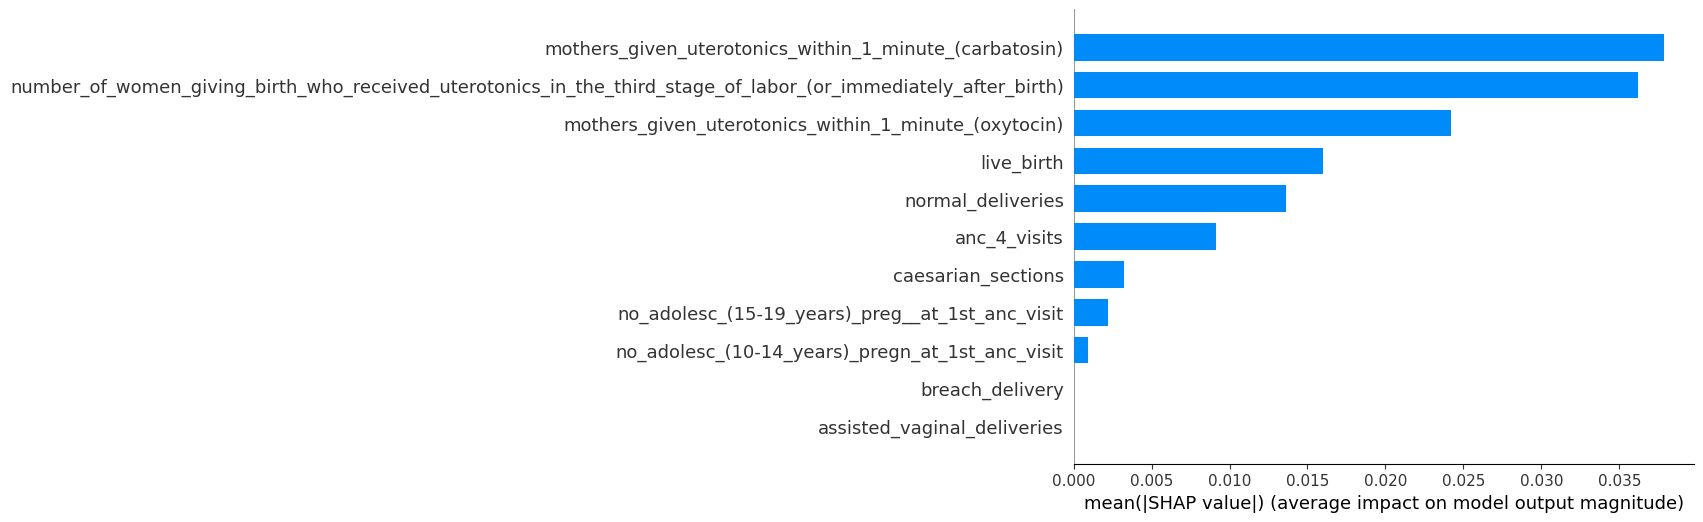

In [27]:
# Choose the model you want to explain
model = rf_model

import shap

# SHAP for global interpretability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary
# Use shap_values[:, :, 1] to get SHAP values for the positive class for all samples
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar", show=True)

In [33]:
#  LIME for local explanation
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    class_names=["No Complication", "Complication"],
    mode='classification'
)
i = 0
lime_exp = lime_explainer.explain_instance(X_test_scaled[i], rf_model.predict_proba)
lime_exp.show_in_notebook()



/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


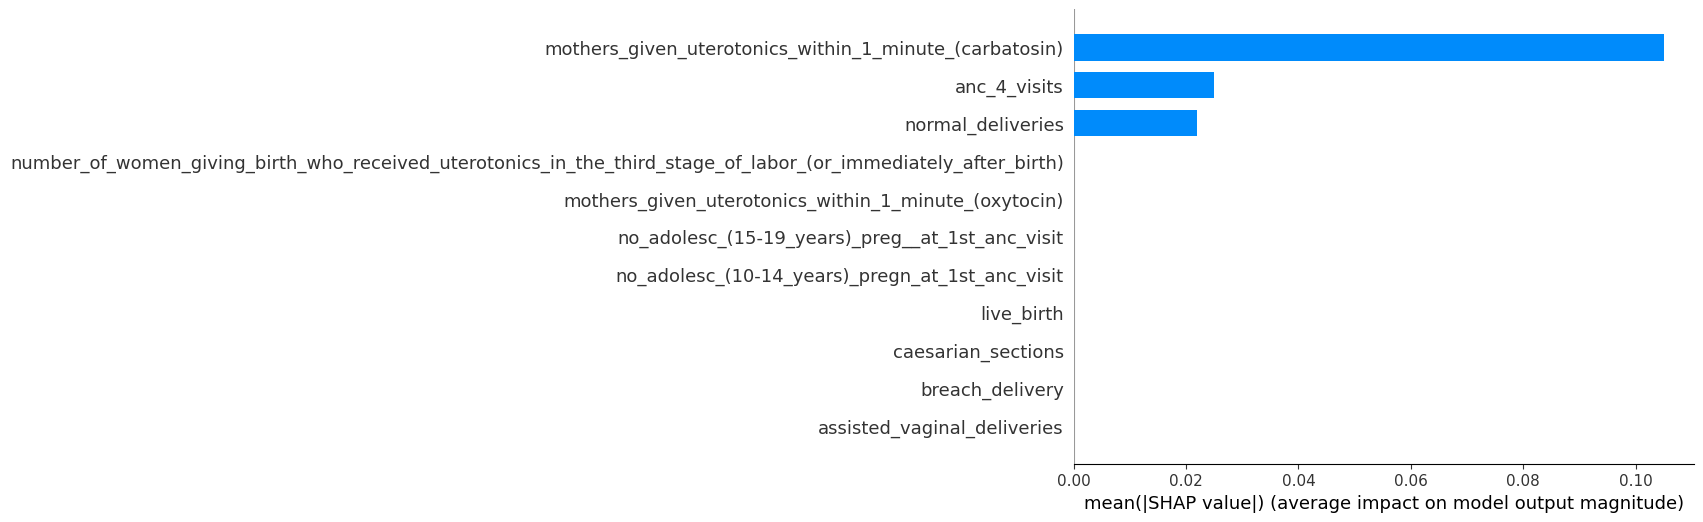

In [28]:
# Choose the model you want to explain
model = dt_model

import shap

# SHAP for global interpretability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary
# Use shap_values[:, :, 1] to get SHAP values for the positive class for all samples
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar", show=True)

In [34]:
#  LIME for local explanation
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=features,
    class_names=["No Complication", "Complication"],
    mode='classification'
)
i = 0
lime_exp = lime_explainer.explain_instance(X_test_scaled[i], dt_model.predict_proba)
lime_exp.show_in_notebook()



In [43]:
# Risk-based recommendations
def recommend_intervention(row):
    recs = []
    if row['anc_4_visits'] < 4:
        recs.append("Increase ANC visits")
    if row['no_adolesc_(10-14_years)_pregn_at_1st_anc_visit'] > 0 or row['no_adolesc_(15-19_years)_preg__at_1st_anc_visit'] > 0:
        recs.append("Adolescent maternal support program")
    if row['mothers_given_uterotonics_within_1_minute_(oxytocin)'] < 1:
        recs.append("Improve uterotonic administration post-delivery")
    return recs

df['Intervention_Recommendations'] = df.apply(recommend_intervention, axis=1)
print(df[['organisationunitname', 'Complication', 'Intervention_Recommendations']].head())

                                organisationunitname  Complication  \
0  Roysambu Sub County/Zimmerman Ward/Family Acce...             0   
1     Starehe Sub County/Pangani Ward/Hayat Hospital             0   
2  Embakasi Central Sub County/Kayole North Ward/...             1   
3  Dagoretti South Sub County/Waithaka Ward/Space...             1   
4  Kibra Sub County/Lindi Ward/Mercillin Afya Centre             1   

                        Intervention_Recommendations  
0  [Increase ANC visits, Adolescent maternal supp...  
1  [Increase ANC visits, Adolescent maternal supp...  
2                              [Increase ANC visits]  
3  [Increase ANC visits, Adolescent maternal supp...  
4                              [Increase ANC visits]  


In [44]:
# Example of simple rule-based intervention logic
high_risk_indices = np.where(model.predict(X_test_scaled) == 1)[0]
print("\nSample High-Risk Cases (Recommend ANC Visits and Skilled Birth Attendance):")
print(X_test.iloc[high_risk_indices].head())


Sample High-Risk Cases (Recommend ANC Visits and Skilled Birth Attendance):
     assisted_vaginal_deliveries  breach_delivery  caesarian_sections  \
154                           19                0                   0   
215                            0                0                   0   
15                             0                0                   0   
173                            0                0                   0   
158                            0               11                 275   

     live_birth  no_adolesc_(10-14_years)_pregn_at_1st_anc_visit  \
154         112                                                0   
215          21                                                0   
15            2                                                0   
173         202                                               58   
158         473                                               83   

     no_adolesc_(15-19_years)_preg__at_1st_anc_visit  normal_deliveries  \
